### Which streaming service has the most overall highly rated shows?

A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

In [13]:
# import pandas as pd, numpy as np, scipy as sp, seaborn as sns, pyplot as plt 
import pandas as pd

import numpy as np
import scipy as sp
import seaborn as sns 
from matplotlib import pyplot as plt 

In [59]:
import thinkstats2
import thinkplot

In [10]:
df_tv = pd.read_csv('tv_shows.csv')
df_tv = df_tv.dropna()
df_tv.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


Describe what the 5 variables mean in the dataset (Chapter 1).

- Variables 
    - Title: Streaming Service TV show titles
    - IMDb: Ratings given for the show on IMDB
    - Rotten Tomatoes: Ratings given for the show on
    - Netflix: Is the show found on Netflix (boolean)	
    - Hulu: Is the show found on Hulu (boolean)	
    - Prime Video: Is the show found on Prime Video (boolean)
    - Disney+: Is the show found on Disney+ (boolean)

Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

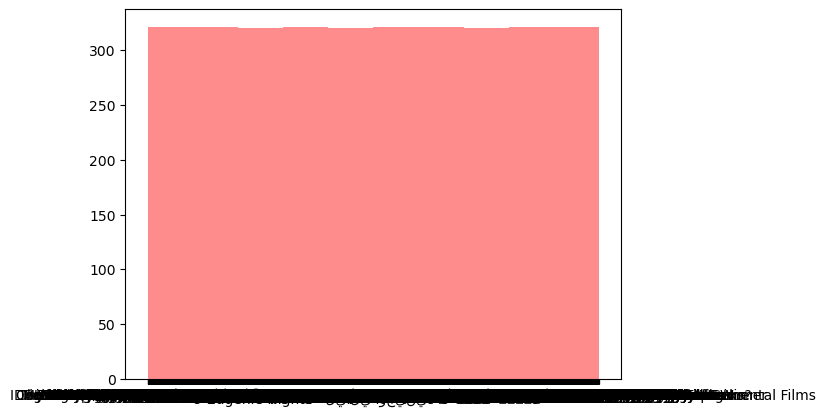

In [17]:
plt.hist(df_tv['Title'],bins = 10, 
         alpha = 0.45, color = 'red') 
plt.show() 

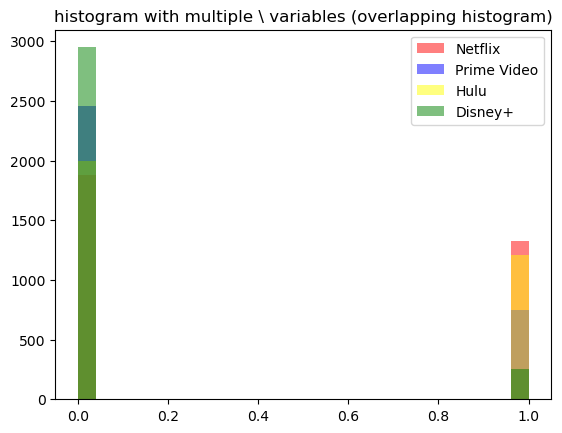

In [20]:
# plotting four histograms on the same axis 
plt.hist(df_tv['Netflix'],bins = 25, alpha = 0.5,  
         color = 'red') 
plt.hist(df_tv['Prime Video'],bins = 25, alpha = 0.5, 
         color = 'blue') 
plt.hist(df_tv['Hulu'],bins = 25, alpha = 0.5, 
         color = 'yellow') 
plt.hist(df_tv['Disney+'],bins = 25, alpha = 0.5, 
         color = 'green')
  
plt.title("histogram with multiple \ variables (overlapping histogram)") 
plt.legend(['Netflix','Prime Video','Hulu', 'Disney+' ]) 
  
plt.show() 

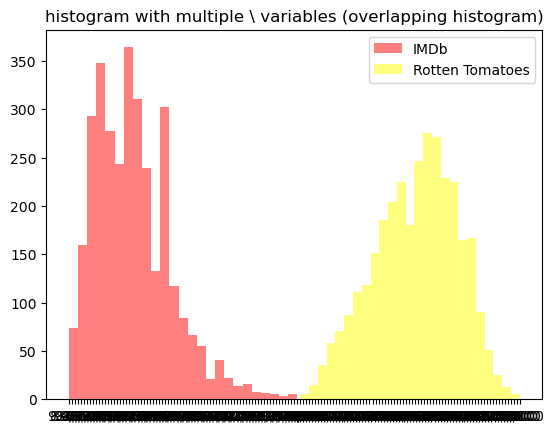

In [22]:
# plotting two histograms on the same axis 
plt.hist(df_tv['IMDb'],bins = 25, alpha = 0.5,  
         color = 'red') 
plt.hist(df_tv['Rotten Tomatoes'],bins = 25, alpha = 0.5, 
         color = 'yellow') 

plt.title("histogram with multiple \ variables (overlapping histogram)") 
plt.legend(['IMDb','Rotten Tomatoes']) 
  
plt.show() 

Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [29]:
df_tv.dtypes

Unnamed: 0          int64
ID                  int64
Title              object
Year                int64
Age                object
IMDb               object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object

In [40]:
df_tv = df_tv.rename(columns={'Rotten Tomatoes': 'Rotten_Tomatoes'})
print(df_tv.Rotten_Tomatoes)

0       100/100
1        96/100
2        95/100
3        94/100
4        93/100
         ...   
5336     31/100
5339     30/100
5340     30/100
5341     29/100
5342     28/100
Name: Rotten_Tomatoes, Length: 3207, dtype: object


In [43]:
df_tv[['Rotten_Tomatoes', 'out_of']] = df_tv['Rotten_Tomatoes'].str.split('/', expand=True)

In [44]:
df_tv.Rotten_Tomatoes = df_tv.Rotten_Tomatoes.astype(float)

In [46]:
df_tv['Rotten_Tomatoes'].mean()

57.67664483941378

In [47]:
df_tv['Rotten_Tomatoes'].mode()

0    52.0
Name: Rotten_Tomatoes, dtype: float64

In [48]:
#Spread
df_tv['Rotten_Tomatoes'].var()

190.7534874293422

<Axes: >

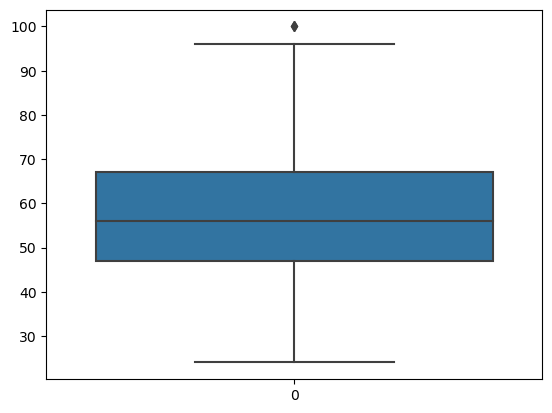

In [49]:
#Tails/outliers
sns.boxplot(df_tv['Rotten_Tomatoes'])

In [51]:
df_tv[['IMDb', 'out_of2']] = df_tv['IMDb'].str.split('/', expand=True)

In [52]:
df_tv.IMDb = df_tv.IMDb.astype(float)

In [55]:
df_tv['IMDb'].mean()

7.13364515123168

In [56]:
df_tv['IMDb'].mode()

0    7.4
Name: IMDb, dtype: float64

In [57]:
#Spread
df_tv['IMDb'].var()

1.1878851179607308

<Axes: >

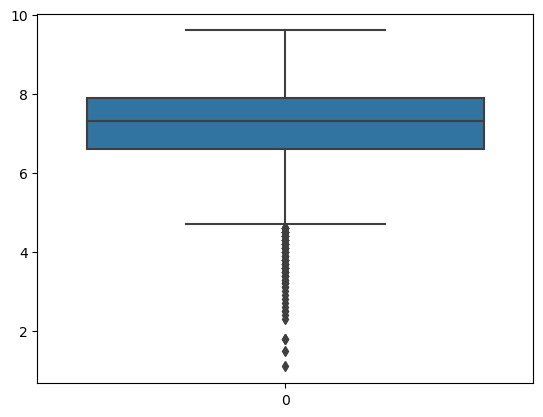

In [58]:
#Tails/outliers
sns.boxplot(df_tv['IMDb'])

Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

<Axes: xlabel='Netflix'>

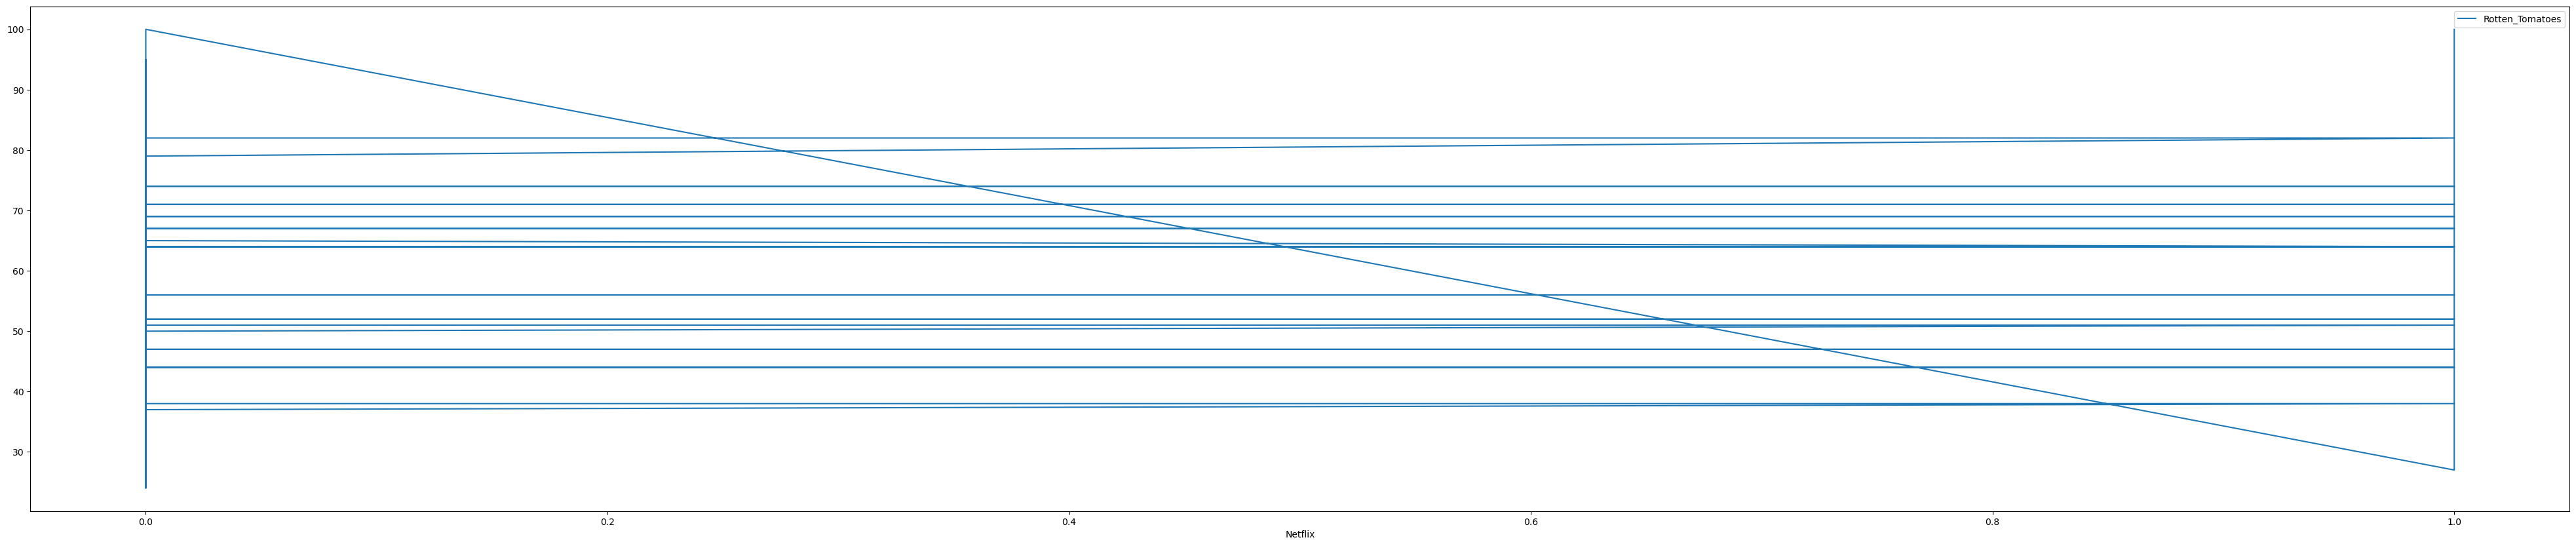

In [66]:
df_tv.plot(x="Netflix", y=["Rotten_Tomatoes"],
        kind="line", figsize=(50, 10))

<Axes: xlabel='Netflix'>

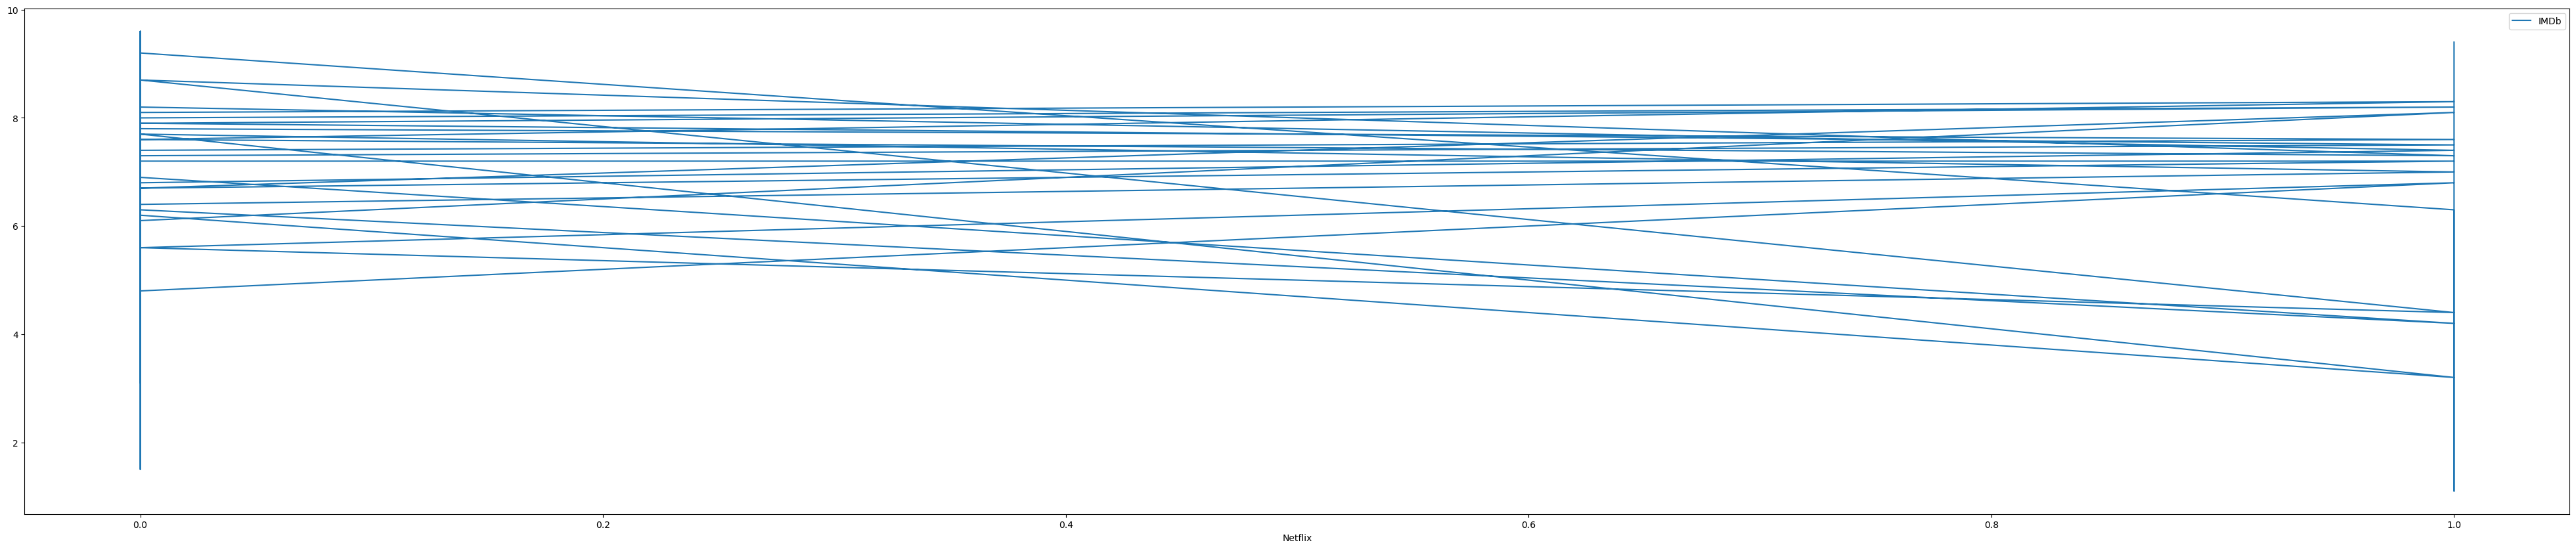

In [67]:
df_tv.plot(x="Netflix", y=["IMDb"],
        kind="line", figsize=(50, 10))

Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

In [72]:
IMDb_ratings = df_tv["IMDb"]

In [73]:
# Calculate the cumulative proportion of the data that falls below each value
cumulative = np.linspace(0, 1, len(IMDb_ratings))

# Sort the data in ascending order
sorted_data = np.sort(IMDb_ratings)

# Calculate the cumulative proportion of the sorted data
cumulative_data = np.cumsum(sorted_data) / np.sum(sorted_data)

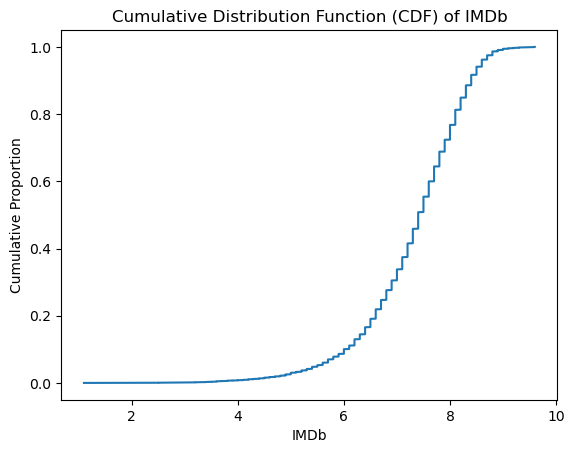

In [74]:
# Plot the CDF
plt.plot(sorted_data, cumulative_data)

# Add labels and title
plt.xlabel("IMDb")
plt.ylabel("Cumulative Proportion")
plt.title("Cumulative Distribution Function (CDF) of IMDb")
plt.show()

The CDF tells me that regardless of the streaming service most shows are rated as a 6/10 or higher. 

Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

In [75]:
from scipy.stats import expon

Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).